## Python/Numpy

1.  Write functions to compute the mean, and standard deviation of a list of data

In [1]:
import numpy as np
norm_vars  = [24, 26, 29, 29, 30, 30, 31, 33, 30, 25]
def getMean(data):
    return sum(data)/len(data)

def getSD(data):
    mean = getMean(data)
    sd = 0
    for x in data:
        sd += (x - mean) ** 2
    variance = sd / len(data)
    return variance ** 0.5   #sqrt(variance)

print(getMean(norm_vars ))  
print(getSD(norm_vars ))

28.7
2.6851443164195103


In [4]:
import sys
print(sys.executable)

/Users/jiagao/repository_jia/MSD_JIA/CS6017/.venv/bin/python


2.  Use `scipy.stats.norm` to sample from the normal(gaussian) distribution.  Compute the mean, and standard deviation of your set of samples using your functions, and with the built in numpy methods.  Verify you get the expected results (you know what these values should be if you sample from a normal distribution).
    
3.  Plot a histogram of your samples.

Mean: 28.699872422570003
SD: 2.6627277896935535


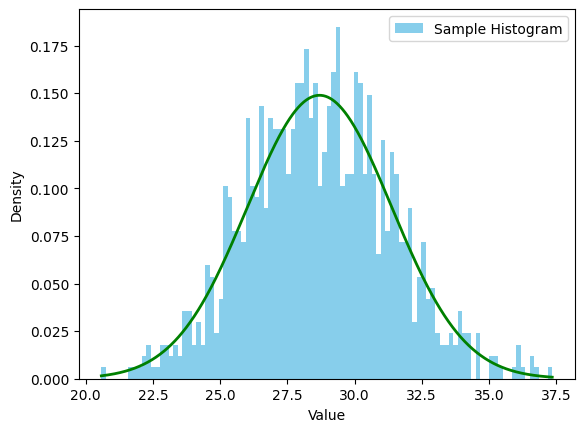

In [5]:
import scipy as sc
from scipy.stats import norm
import matplotlib.pyplot as plt

norm_vars = norm.rvs(loc = 28.7, scale = 2.68, size=1000)
print("Mean:", getMean(norm_vars))
print("SD:", getSD(norm_vars))

x = np.linspace(min(norm_vars), max(norm_vars), 1000)
pdf = norm.pdf(x, loc = 28.7, scale = 2.68)

plt.hist(norm_vars , bins=100, density=True, color='skyblue', label="Sample Histogram")
plt.plot(x, pdf, linewidth=2, color="g")
plt.xlabel("Value")

plt.ylabel("Density")
plt.legend()
plt.show()


## Data Exploration/Analyis 2024


Data points: 8722


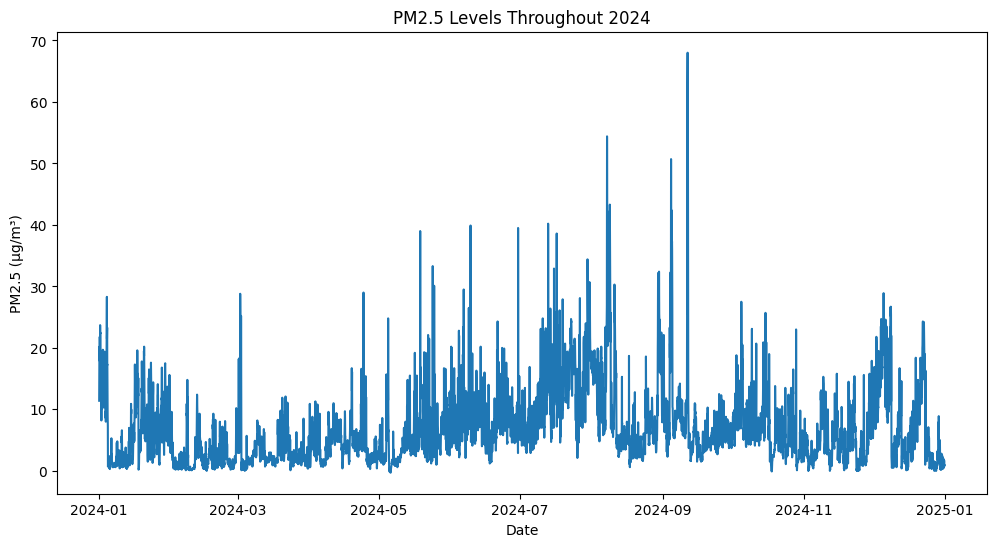

Monthly means:
Month 1: 7.1
Month 2: 2.4
Month 3: 3.1
Month 4: 4.4
Month 5: 5.0
Month 6: 8.5
Month 7: 12.6
Month 8: 9.8
Month 9: 7.8
Month 10: 6.9
Month 11: 4.7
Month 12: 7.9


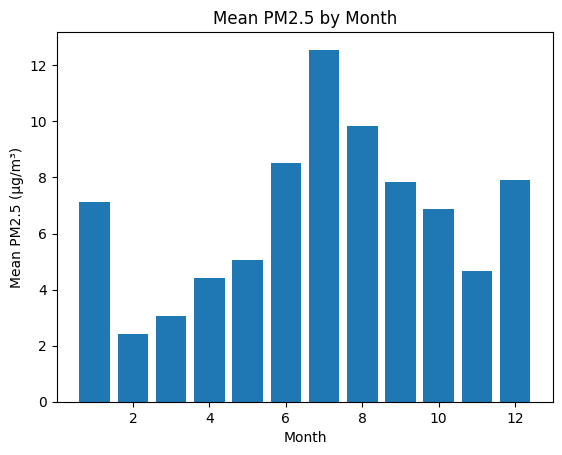

Hourly means:
Peak hour: 9:00 (8.4)
Low hour: 2:00 (5.6)


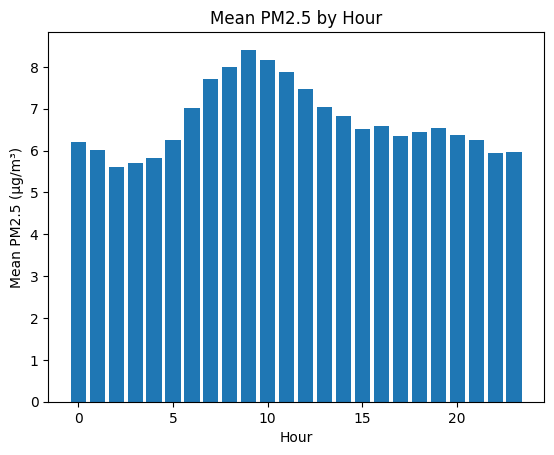

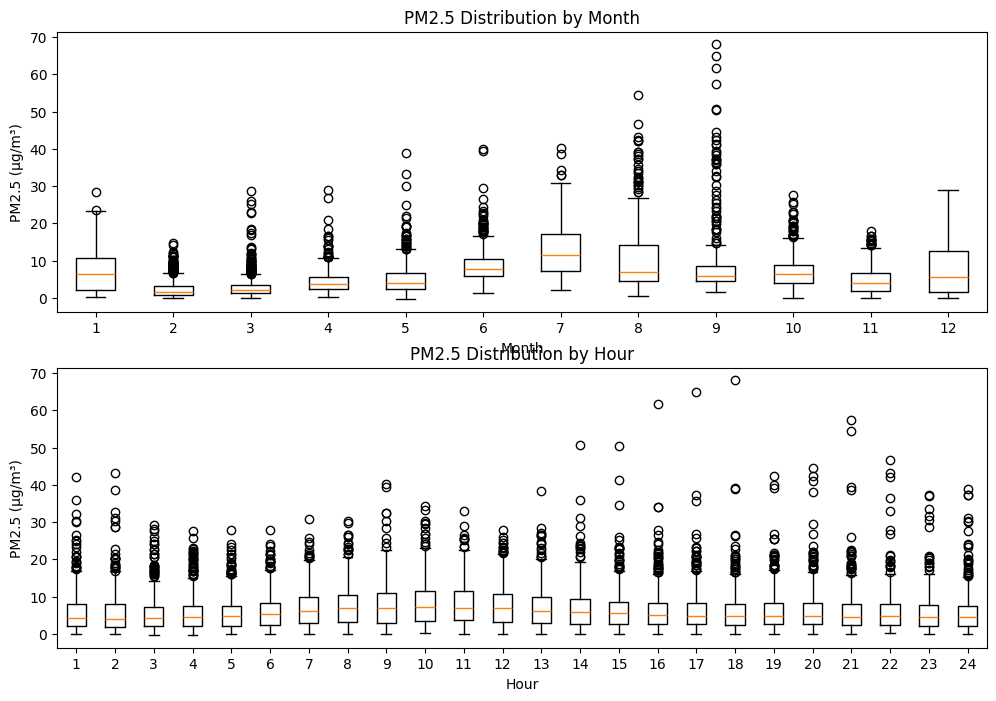

In [6]:
import pandas as pd
df = pd.read_csv('2024PM2.5.csv', skiprows = 2)
#convert date
df['Date'] =  pd.to_datetime(df['Date'])
#station
date_col = df['Date']
pm25_col = df.iloc[:, 1] 
station_data = pd.DataFrame({'Date': date_col, 'PM25': pm25_col})
#remove n/a
station_data = station_data.dropna()
print(f"Data points: {len(station_data)}")
#fullyear
plt.figure(figsize=(12, 6))
plt.plot(station_data['Date'], station_data['PM25'])
plt.xlabel('Date')
plt.ylabel('PM2.5 (μg/m³)')
plt.title('PM2.5 Levels Throughout 2024')
plt.show()

#Monthly analysis
station_data['Month'] = station_data['Date'].dt.month

#Group by month and calculate means
monthly_groups = station_data.groupby('Month')['PM25']
monthly_means = monthly_groups.mean()

print("Monthly means:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean:.1f}")

#Plot monthly bar chart
plt.bar(monthly_means.index, monthly_means.values)
plt.xlabel('Month')
plt.ylabel('Mean PM2.5 (μg/m³)')
plt.title('Mean PM2.5 by Month')
plt.show()

#Hourly analysis
station_data['Hour'] = station_data['Date'].dt.hour

#Group by hour and calculate means
hourly_groups = station_data.groupby('Hour')['PM25']
hourly_means = hourly_groups.mean()

print("Hourly means:")
peak_hour = hourly_means.idxmax()
peak_value = hourly_means.max()
low_hour = hourly_means.idxmin()
low_value = hourly_means.min()

print(f"Peak hour: {peak_hour}:00 ({peak_value:.1f})")
print(f"Low hour: {low_hour}:00 ({low_value:.1f})")

# Plot hourly bar chart
plt.bar(hourly_means.index, hourly_means.values)
plt.xlabel('Hour')
plt.ylabel('Mean PM2.5 (μg/m³)')
plt.title('Mean PM2.5 by Hour')
plt.show()

# Box plots
plt.figure(figsize=(12, 8))

# Monthly box plot
plt.subplot(2, 1, 1)
monthly_data = []
for month in range(1, 13):
    month_values = station_data[station_data['Month'] == month]['PM25']
    monthly_data.append(month_values)
plt.boxplot(monthly_data)
plt.xlabel('Month')
plt.ylabel('PM2.5 (μg/m³)')
plt.title('PM2.5 Distribution by Month')

# Hourly box plot
plt.subplot(2, 1, 2)
hourly_data = []
for hour in range(24):
    hour_values = station_data[station_data['Hour'] == hour]['PM25']
    hourly_data.append(hour_values)
plt.boxplot(hourly_data)
plt.xlabel('Hour')
plt.ylabel('PM2.5 (μg/m³)')
plt.title('PM2.5 Distribution by Hour')

plt.show()